In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
data=pd.read_csv("Mall_Customers.csv")

In [151]:
data.shape

(200, 5)

In [152]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [154]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [155]:
data.rename(columns={"CustomerID":"customer_id","Gender":"gender","Age":"age","Annual Income (k$)":"annual_income",
                     "Spending Score (1-100)":"spending_scores"},inplace=True)

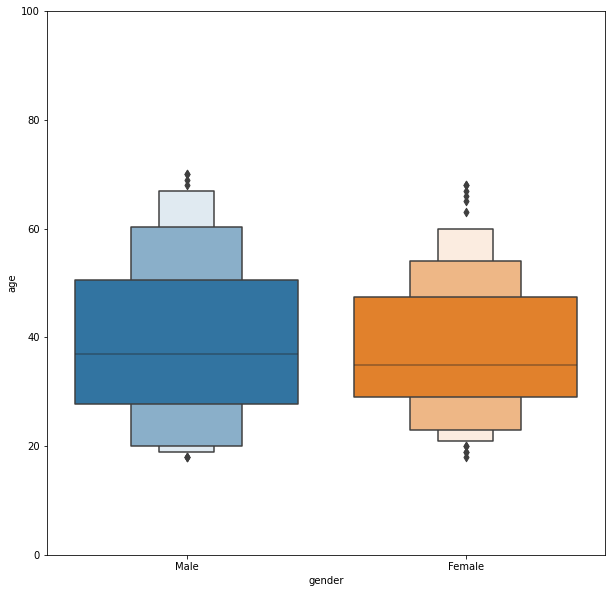

In [156]:
temp = pd.concat([data['age'], data['gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='gender', y="age", data=data)
fig.axis(ymin=0, ymax=100);

<AxesSubplot:xlabel='gender', ylabel='spending_scores'>

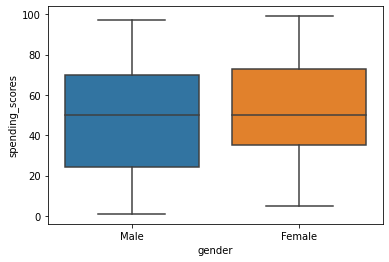

In [157]:
sns.boxplot(x=data['gender'],y=data['spending_scores'])

<AxesSubplot:xlabel='gender', ylabel='annual_income'>

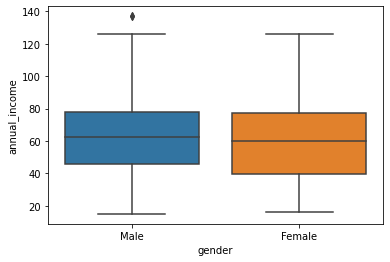

In [158]:
sns.boxplot(x=data['gender'],y=data['annual_income'])

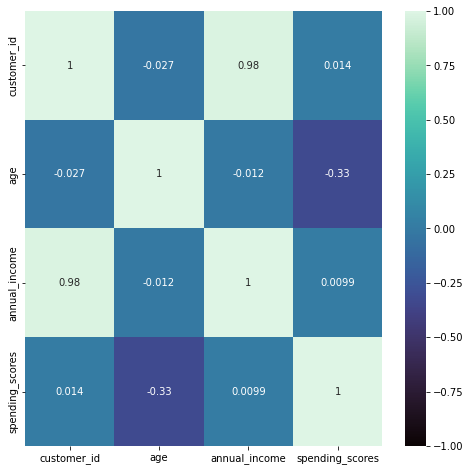

In [159]:
corr=data.corr()
plt.figure(figsize=(8,8))
sn=sns.heatmap(corr,vmin=-1,center=0, annot = True, cmap = 'mako')

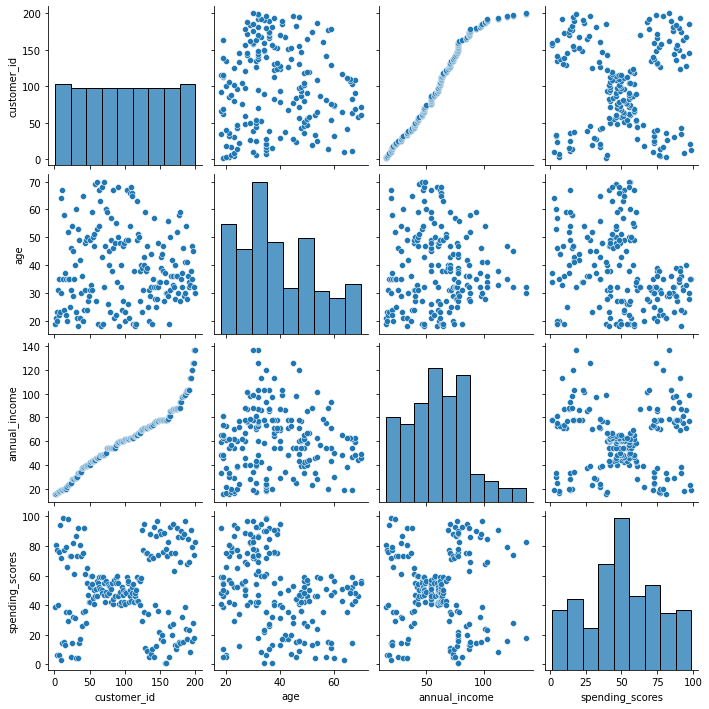

In [160]:
sns.pairplot(data)

In [161]:
data[data.duplicated()]

,customer_id,gender,age,annual_income,spending_scores


In [162]:
data.isnull().sum()

customer_id        0
gender             0
age                0
annual_income      0
spending_scores    0
dtype: int64

In [163]:
numerical_cols = ["age", "annual_income", "spending_scores"]

In [164]:
data.dtypes

customer_id         int64
gender             object
age                 int64
annual_income       int64
spending_scores     int64
dtype: object

In [165]:
outliers = data[numerical_cols].quantile(q=(0.25,0.75))

In [166]:
outliers

,age,annual_income,spending_scores
0.25,28.75,41.5,34.75
0.75,49.00,78.0,73.00


In [167]:
q1=data[numerical_cols].quantile(0.25)  #(Q1)
q3=data[numerical_cols].quantile(0.75)  #(Q3)
IQR=q3-q1
IQR

age                20.25
annual_income      36.50
spending_scores    38.25
dtype: float64

In [168]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR
median = data[numerical_cols].median()
median

age                36.0
annual_income      61.5
spending_scores    50.0
dtype: float64

In [169]:
data[numerical_cols]= np.where(data[numerical_cols]>upper_limit,median,data[numerical_cols])

<AxesSubplot:xlabel='variable', ylabel='value'>

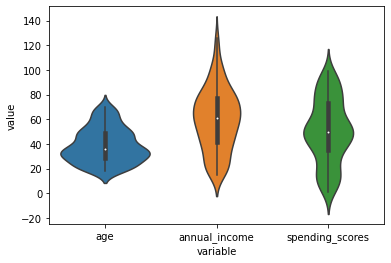

In [170]:
sns.violinplot(x="variable", y="value", data=pd.melt(data[numerical_cols]))

In [171]:
import category_encoders as ce

In [172]:
one_hot_encoder = ce.OneHotEncoder(cols=["gender"], return_df=True)
data = one_hot_encoder.fit_transform(data)
data.head()

,customer_id,gender_1,gender_2,age,annual_income,spending_scores
0,1,1,0,19.0,15.0,39.0
1,2,1,0,21.0,15.0,81.0
2,3,0,1,20.0,16.0,6.0
3,4,0,1,23.0,16.0,77.0
4,5,0,1,31.0,17.0,40.0


In [173]:
columns = data.columns
columns

Index(['customer_id', 'gender_1', 'gender_2', 'age', 'annual_income',
       'spending_scores'],
      dtype='object')

In [174]:
from sklearn.preprocessing import minmax_scale
data = minmax_scale(data)
data = pd.DataFrame(data, columns=columns)

In [175]:
data

,customer_id,gender_1,gender_2,age,annual_income,spending_scores
0,0.000000,1.0,0.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.0,0.057692,0.000000,0.816327
2,0.010050,0.0,1.0,0.038462,0.009009,0.051020
3,0.015075,0.0,1.0,0.096154,0.009009,0.775510
4,0.020101,0.0,1.0,0.250000,0.018018,0.397959
...,...,...,...,...,...,...
195,0.979899,0.0,1.0,0.326923,0.945946,0.795918
196,0.984925,0.0,1.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.0,0.269231,0.418919,0.173469


In [176]:
from sklearn.cluster import KMeans

In [177]:
data.drop('customer_id',axis=1,inplace=True)

In [178]:
km = KMeans(n_clusters=3, random_state=0)

In [179]:
data['Group or Cluster'] = km.fit_predict(data)

In [180]:
data.head()

,gender_1,gender_2,age,annual_income,spending_scores,Group or Cluster
0,1.0,0.0,0.019231,0.000000,0.387755,2
1,1.0,0.0,0.057692,0.000000,0.816327,2
2,0.0,1.0,0.038462,0.009009,0.051020,1
3,0.0,1.0,0.096154,0.009009,0.775510,1
4,0.0,1.0,0.250000,0.018018,0.397959,1


In [181]:
data['Group or Cluster'].value_counts()

1    112
0     48
2     40
Name: Group or Cluster, dtype: int64

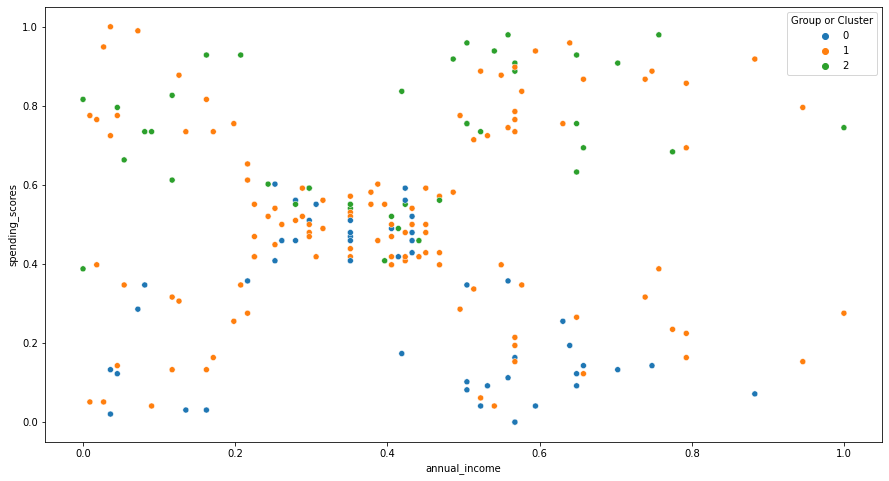

In [184]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data['annual_income'],
                y=data['spending_scores'],
                hue=data['Group or Cluster'],
                palette='tab10')
plt.show()

In [183]:
from sklearn.metrics import silhouette_score, silhouette_samples
score = silhouette_score(data, 
                         km.labels_, 
                         metric='euclidean')
score

0.7203123029546368

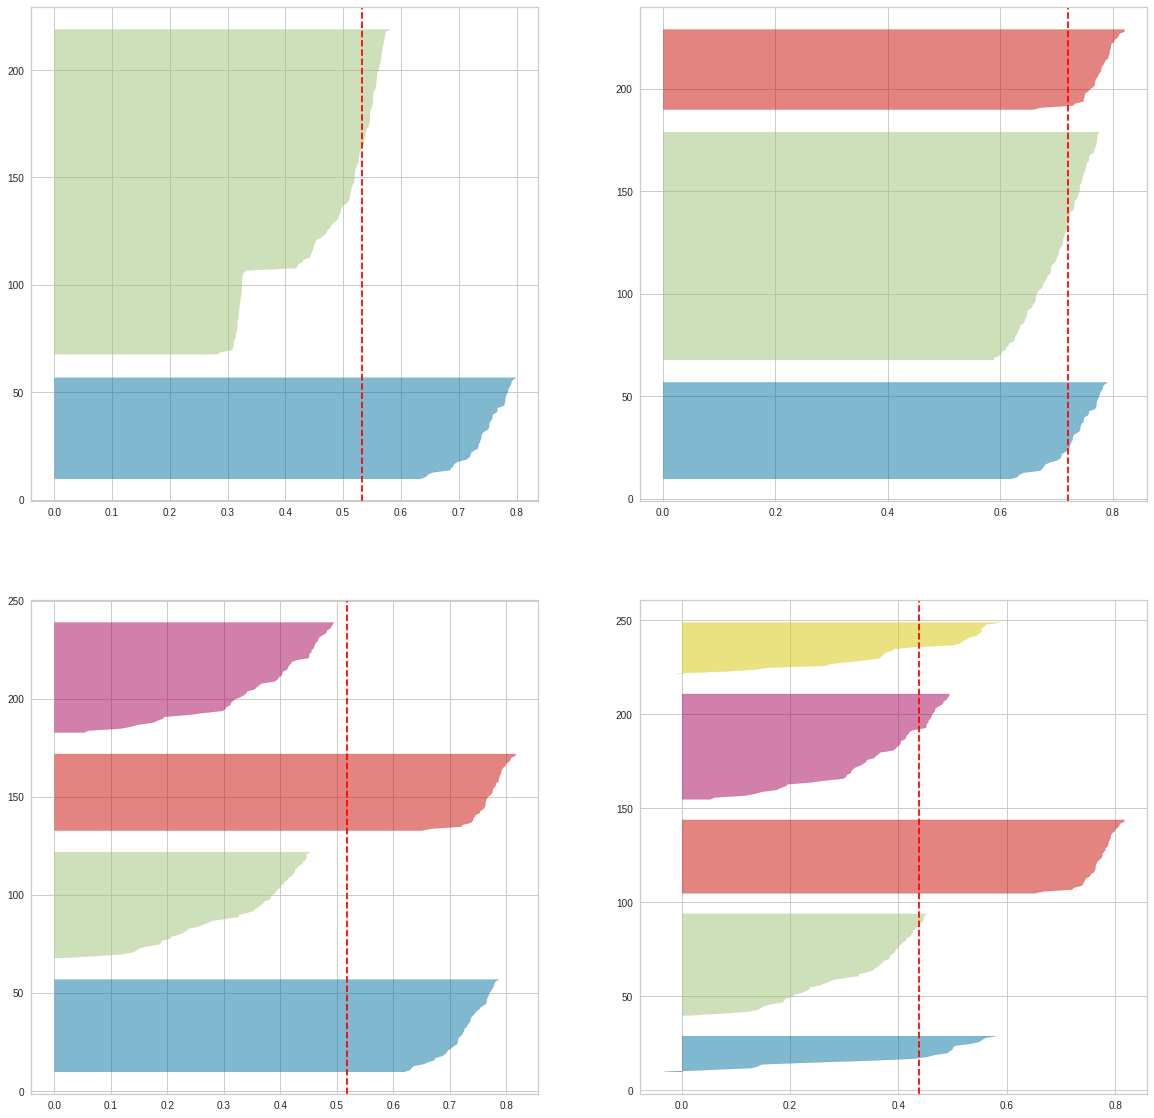

In [186]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(20,20))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=100, 
                random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, 
                                      colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(data)